In [1]:
print("whats up data nerds")

whats up data nerds


In [2]:
import pandas as pd

In [3]:
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\dell\anaconda3\envs\python_class\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\dell\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Sep 13 20:44:41 2025).


In [5]:
df.loc[:,"salary_rate":"salary_hour_avg"].dropna(subset="salary_rate")

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [6]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


Project continue from pd_access

In [7]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\dell\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Sep 13 20:44:41 2025).


In [8]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skill_counts = df_skills.groupby(["job_title_short","job_skills"]).size()
df_skill_count = skill_counts.reset_index(name = "skill_counts")
df_skill_count.sort_values(by = "skill_counts",ascending = False,inplace = True)

df_skill_count

,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [9]:
job_titles = ["Data Scientist","Data Engineer","Data Analyst"]

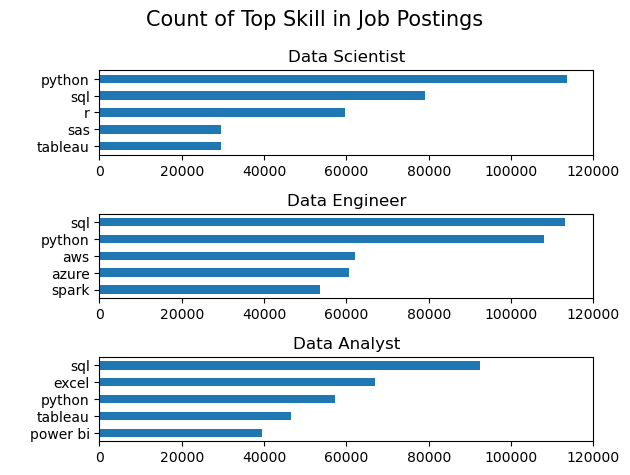

In [10]:
fig,ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count["job_title_short"]== job_title].head(5)
    df_plot.plot(kind = "barh",x="job_skills",y="skill_counts",ax=ax[i],title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(" ")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

    fig.tight_layout()
    fig.suptitle("Count of Top Skill in Job Postings",fontsize =15)

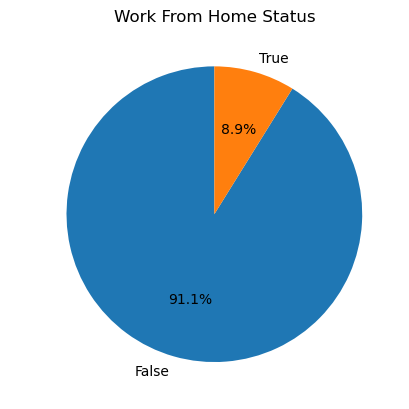

In [11]:
df["job_work_from_home"].value_counts().plot(kind = "pie",startangle = 90,autopct="%1.1f%%")
plt.title("Work From Home Status")
plt.ylabel(" ")
plt.show()

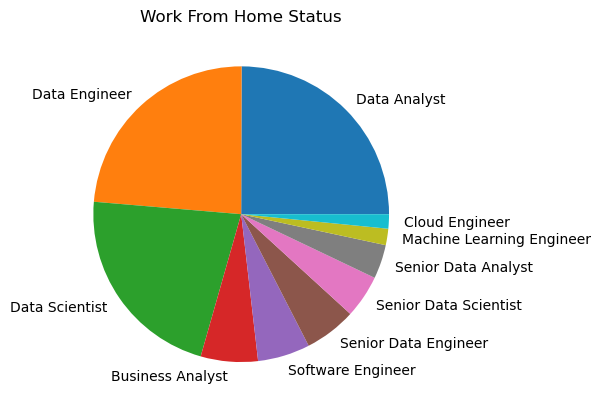

In [12]:
df["job_title_short"].value_counts().plot(kind = "pie")
plt.title("Work From Home Status")
plt.ylabel(" ")
plt.show()

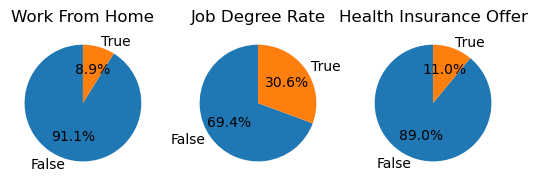

In [13]:
fg,ax= plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Rate',
    'job_health_insurance':'Health Insurance Offer'
}

for i, (column , title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle = 90, autopct = "%1.1f%%",labels = ["False","True"])
    ax[i].set_title(title)
#plt.show()

In [14]:
df_da = df[df["job_title_short"] == "Data Analyst"]

In [15]:
df_exploded = df_da.explode("job_skills")
skill_stats = df_exploded.groupby("job_skills").agg(
    median_salary = ("salary_year_avg","median"),
    skill_count = ("job_skills","count")
  )


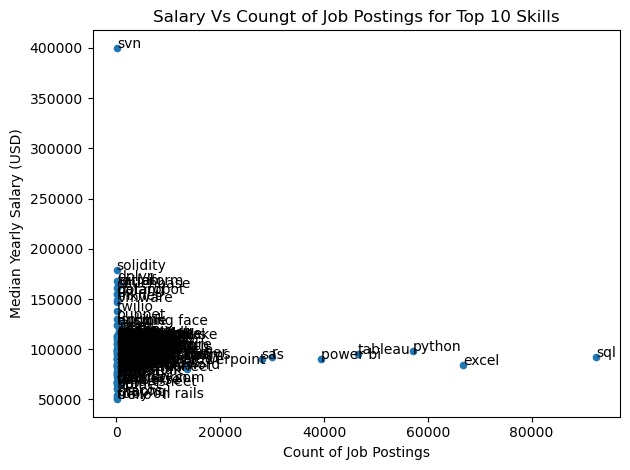

In [16]:
skill_stats.plot(kind = "scatter", x= "skill_count",y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary (USD)")
plt.title("Salary Vs Coungt of Job Postings for Top 10 Skills")
plt.tight_layout()

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i],skill_stats["median_salary"].iloc[i],txt)
    
plt.show()

In [17]:
df_DA =df[df["job_title_short"]=="Data Analyst"].copy()
df_DA["month_no"] = df_DA["job_posted_date"].dt.month

df_exploded = df_DA.explode("job_skills")
df_DA_pivot = df_exploded.pivot_table(index = "month_no", columns = "job_skills", aggfunc = "size",fill_value= 0)

df_DA_pivot.loc["Total"]=df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending = False).index]

df_DA_pivot = df_DA_pivot.drop("Total")

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


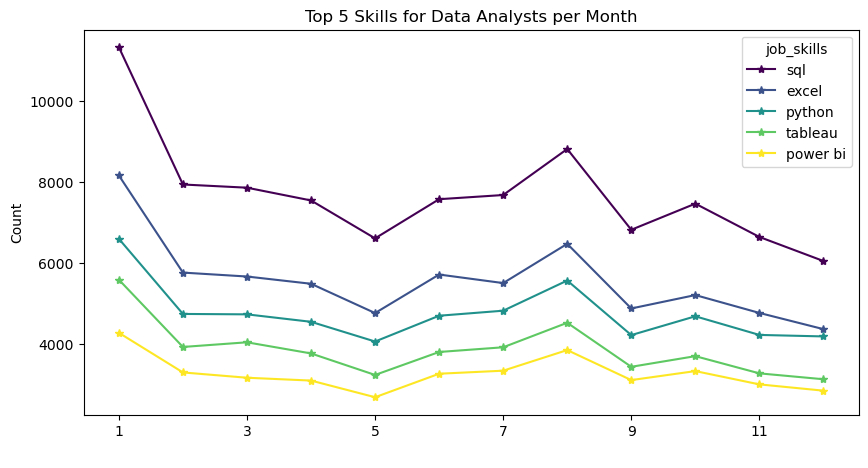

In [18]:
df_DA_pivot.iloc[:, :5].plot(
    kind = "line",
    colormap = "viridis",
    marker = "*",
    figsize = (10,5)
    )
plt.title("Top 5 Skills for Data Analysts per Month")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

In [19]:
df_exploded = df_da.explode("job_skills")
skill_stats = df_exploded.groupby("job_skills").agg(
    median_salary = ("salary_year_avg","median"),
    skill_count = ("job_skills","count")
  )
job_skill = 20
skill_stats = skill_stats.sort_values(by = "skill_count",ascending = False).head(job_skill)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


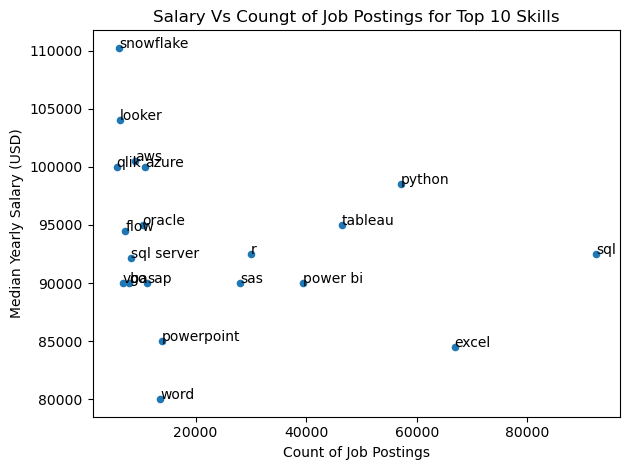

In [20]:
skill_stats.plot(kind = "scatter", x= "skill_count",y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary (USD)")
plt.title("Salary Vs Coungt of Job Postings for Top 10 Skills")
plt.tight_layout()

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i],skill_stats["median_salary"].iloc[i],txt)
    
plt.show()

In [21]:
df_DA_US = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]== "United States")].copy()

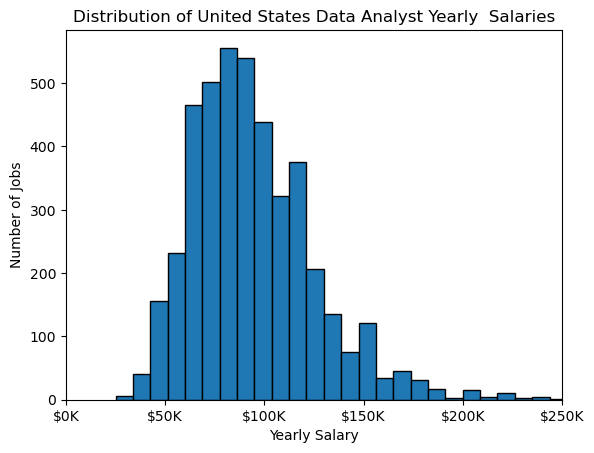

In [22]:
df_DA_US["salary_year_avg"].plot(kind = "hist", bins = 40, edgecolor = "black")
plt.xlim(0,250000)
plt.title("Distribution of United States Data Analyst Yearly  Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))



#for line modification
#ax =plt.gca()
#ax.xaxis.set_major_formatter(plt.Funcformatter(lambda x, _: f'${int(x/1000)}k'))

In [23]:
df_DA_US = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]== "United States")].copy()
df_DA_US.dropna(subset = ["salary_year_avg"])

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


<Axes: >

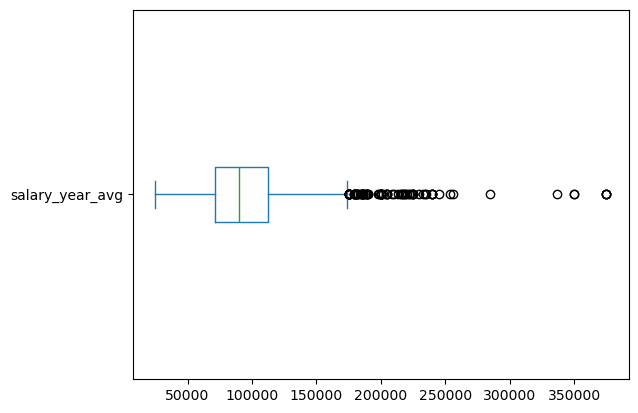

In [24]:
df_DA_US["salary_year_avg"].plot(kind = "box",vert = False)

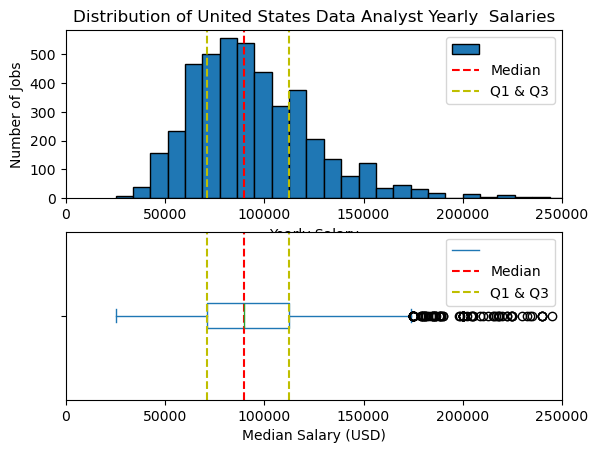

In [25]:
fg,ax =plt.subplots(2,1)
fig.tight_layout()



df_DA_US["salary_year_avg"].plot(kind = "hist",ax=ax[0],bins = 40, edgecolor = "black")
ax[0].set_xlim(0,250000)
ax[0].set_title("Distribution of United States Data Analyst Yearly  Salaries")
ax[0].set_xlabel("Yearly Salary")
ax[0].set_ylabel("Number of Jobs")

ax[0].axvline(df_DA_US["salary_year_avg"].median(),color ="r",linestyle="--")
ax[0].axvline(df_DA_US["salary_year_avg"].quantile(0.25), color = "y", linestyle = "--")
ax[0].axvline(df_DA_US["salary_year_avg"].quantile(0.75), color = "y", linestyle = "--")
ax[0].legend(["", "Median","Q1 & Q3"])




df_DA_US["salary_year_avg"].plot(kind = "box",ax=ax[1] , vert = False)
ax[1].set_xlim(0,250000)
ax[1].set_yticklabels(" ")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel(" ")

ax[1].axvline(df_DA_US["salary_year_avg"].median(),color ="r",linestyle="--")
ax[1].axvline(df_DA_US["salary_year_avg"].quantile(0.25), color = "y", linestyle = "--")
ax[1].axvline(df_DA_US["salary_year_avg"].quantile(0.75), color = "y", linestyle = "--")
ax[1].legend(["", "Median","Q1 & Q3"])



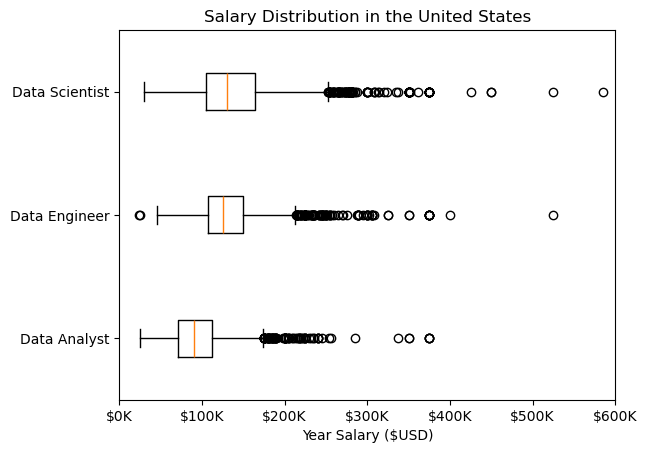

In [26]:
job_titless = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_US = df[(df["job_title_short"].isin (job_titless)) & (df["job_country"] == "United States")].copy()
df_US = df_US.dropna(subset ="salary_year_avg")

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titless]

plt.boxplot( job_list , tick_labels = job_titless, vert = False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Year Salary ($USD)")
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [27]:
df_DA_skill = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"]=="United States")].copy()
df_DA_skill = df_DA_skill.explode("job_skills")
skill_count = df_DA_skill.groupby("job_skills")["salary_year_avg"].median().sort_values(ascending =False).head(10)
skill_count

job_skills
dplyr           196250.0
bitbucket       189000.0
gitlab          186000.0
solidity        179000.0
hugging face    175000.0
couchbase       160515.0
ansible         159640.0
mxnet           149000.0
cassandra       148250.0
vmware          147500.0
Name: salary_year_avg, dtype: float64

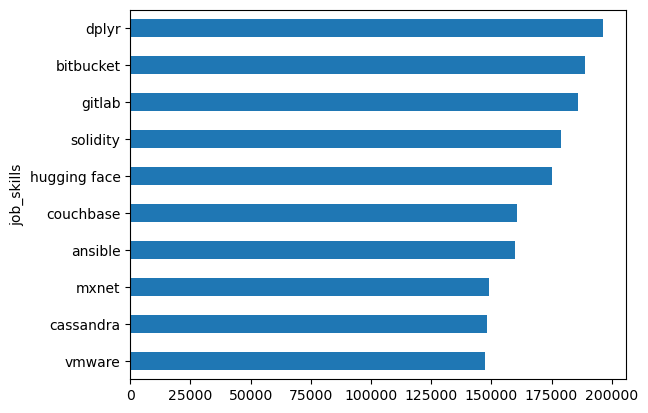

In [28]:
skill_count.plot(kind = "barh")
plt.gca().invert_yaxis()

In [29]:
skill_dmd = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"]== "United States")]
skill_dmd = skill_dmd.dropna(subset = ["salary_year_avg"])
skill_exploded = skill_dmd.explode("job_skills")
skill_dmd = skill_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"])

skill_dmd.sort_values(by="count",ascending = False).head(10)

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


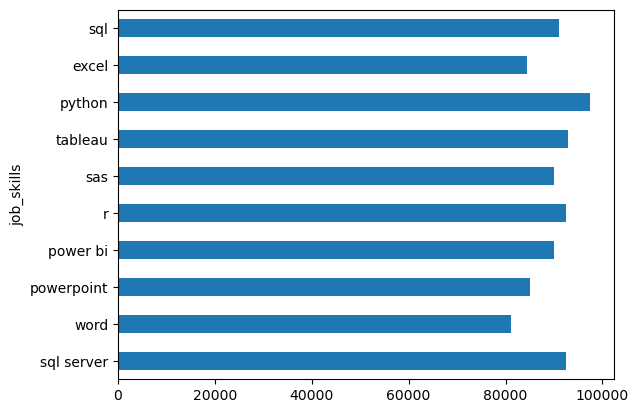

In [60]:
skill_dmd["median"].plot(kind = "barh")
plt.gca().invert_yaxis()

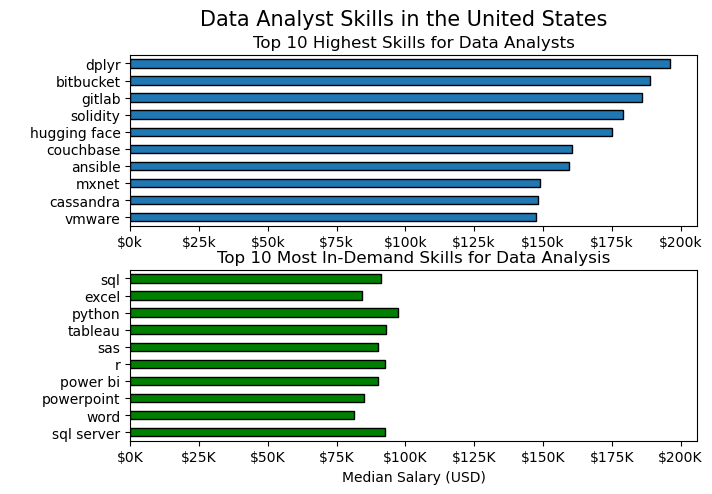

In [91]:
fg,ax = plt.subplots(2,1)
fg.suptitle("Data Analyst Skills in the United States",fontsize = 15)
fg.tight_layout()

df_DA_skill = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"]=="United States")].copy()
df_DA_skill = df_DA_skill.dropna(subset = "salary_year_avg")
df_DA_skill = df_DA_skill.explode("job_skills")
df_DA_skill = df_DA_skill.groupby("job_skills")["salary_year_avg"].agg(["count","median"])
df_DA_skill = df_DA_skill.sort_values(by ="median",ascending = False).head(10)

df_DA_skill["median"].plot(kind = "barh",ax=ax[0],edgecolor = "black")
ax[0].set_title("Top 10 Highest Skills for Data Analysts")
ax[0].set_ylabel(" ")
ax[0].set_xlabel(" ")
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


skill_dmd = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"]== "United States")]
skill_dmd = skill_dmd.dropna(subset = "salary_year_avg")
skill_exploded = skill_dmd.explode("job_skills")
skill_dmd = skill_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"])
skill_dmd = skill_dmd.sort_values(by = "count",ascending = False).head(10)
# Do NOT sort ascending here, keep descending order for largest to lowest

skill_dmd["median"].plot(kind = "barh",ax=ax[1],color = "green",edgecolor = "black")
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysis")
ax[1].set_ylabel(" ")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].invert_yaxis()

(0.0, 206062.5)

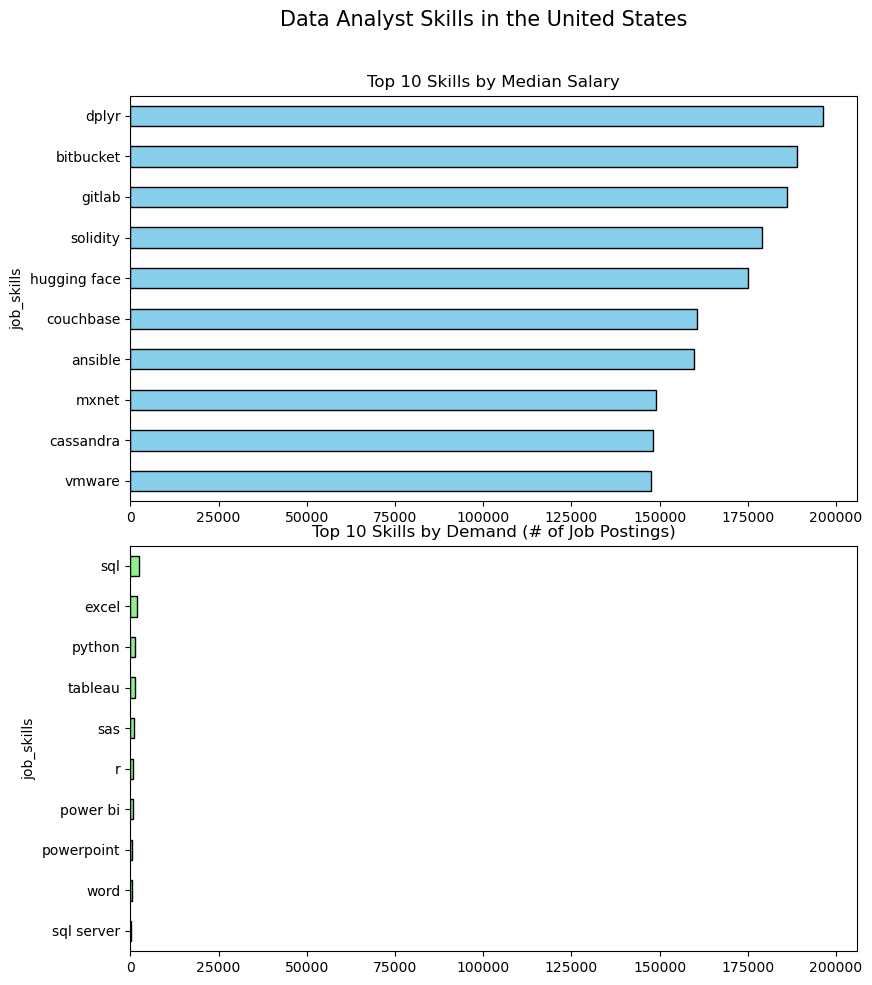

In [32]:
import matplotlib.pyplot as plt

# Create figure with 2 rows, 1 column
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle("Data Analyst Skills in the United States", fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for title

# --- Top 10 highest-paying skills ---
df_DA_skill = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_skill = df_DA_skill.explode("job_skills")
skill_pay = df_DA_skill.groupby("job_skills")["salary_year_avg"].median().sort_values(ascending=False).head(10)

skill_pay.plot(kind="barh", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Skills by Median Salary")

# --- Top 10 most in-demand skills ---
skill_dmd = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")]
skill_dmd = skill_dmd.dropna(subset=["salary_year_avg"])
skill_dmd = skill_dmd.explode("job_skills")
skill_dmd = skill_dmd.groupby("job_skills")["salary_year_avg"].agg(["count","median"])
skill_dmd = skill_dmd.sort_values(by="count", ascending=False).head(10)

skill_dmd["count"].plot(kind="barh", ax=ax[1], color="lightgreen", edgecolor="black")
ax[1].invert_yaxis()
ax[1].set_title("Top 10 Skills by Demand (# of Job Postings)")
ax[1].set_xlim(ax[0].get_xlim())  # match salary chart x-axis scale


In [35]:
import seaborn as sns

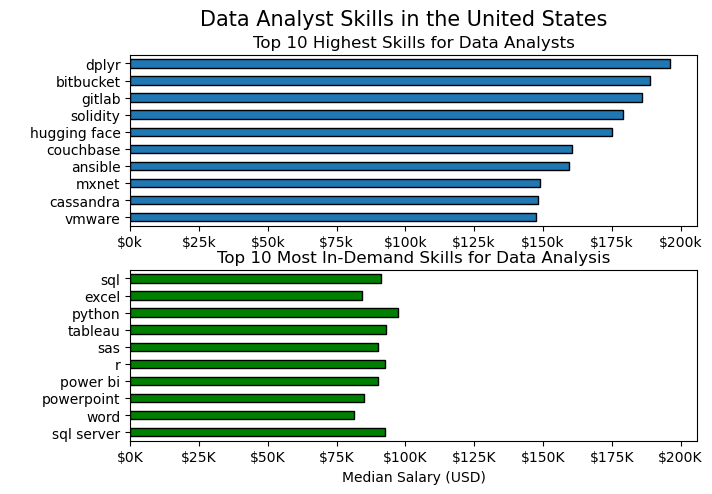

In [36]:
fg,ax = plt.subplots(2,1)
#fg.suptitle("Data Analyst Skills in the United States",fontsize = 15)
#fg.tight_layout()

#df_DA_skill = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"]=="United States")].copy()
#df_DA_skill = df_DA_skill.explode("job_skills")
#skill_count = df_DA_skill.groupby("job_skills")["salary_year_avg"].median().sort_values(ascending =False).head(10)

#skill_count.plot(kind = "barh",ax=ax[0],edgecolor = "black")
ax[0].set_title("Top 10 Highest Skills for Data Analysts")
ax[0].set_ylabel(" ")
ax[0].set_xlabel(" ")
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


#skill_dmd = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"]== "United States")]
#skill_dmd = skill_dmd.dropna(subset = "salary_year_avg")
#skill_exploded = skill_dmd.explode("job_skills")
#skill_dmd = skill_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"])
#skill_dmd = skill_dmd.sort_values(by = "count",ascending = False).head(10)

#skill_dmd["median"].plot(kind = "barh",ax=ax[1],color = "green",edgecolor = "black")
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysis")
ax[1].set_ylabel(" ")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

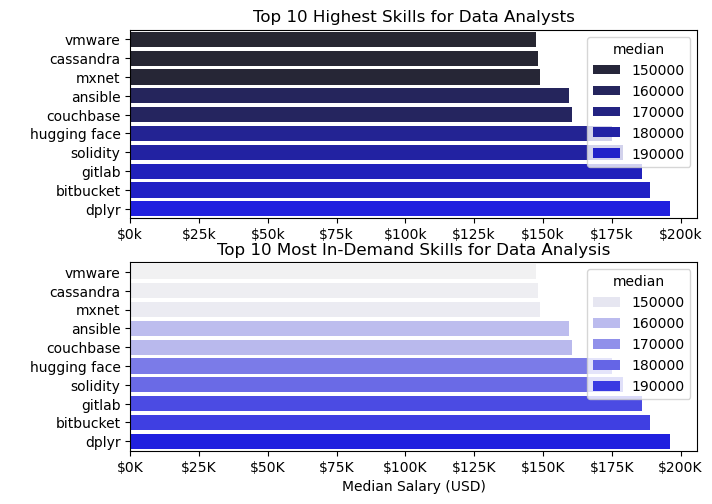

In [72]:


fg,ax = plt.subplots(2,1)
fg.tight_layout()

sns.barplot(data = df_DA_skill ,x = "median", y =df_DA_skill.index, ax =ax[0],hue="median",palette="dark:b")

#skill_count.plot(kind = "barh",ax=ax[0],edgecolor = "black")
ax[0].set_title("Top 10 Highest Skills for Data Analysts")
ax[0].set_ylabel(" ")
ax[0].set_xlabel(" ")
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


sns.barplot(data = skill_dmd,x = "median" ,y =skill_dmd.index, ax =ax[1],hue="median",palette="light:b")
#skill_dmd["median"].plot(kind = "barh",ax=ax[1],color = "green",edgecolor = "black")
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysis")
ax[1].set_ylabel(" ")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

In [71]:
skill_dmd

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [ ]:
import matplotlib.pyplot as plt

# Create figure with 2 rows, 1 column
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle("Data Analyst Skills in the United States", fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for title

# --- Top 10 highest-paying skills (first chart) ---
df_DA_skill = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_skill = df_DA_skill.dropna(subset=["salary_year_avg"])
df_DA_skill = df_DA_skill.explode("job_skills")
skill_pay = df_DA_skill.groupby("job_skills")["salary_year_avg"].median().sort_values(ascending=False).head(10)

skill_pay.plot(kind="barh", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Skills by Median Salary")
ax[0].set_xlabel("Median Salary (USD)")
ax[0].set_ylabel("Skill")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# --- Top 10 most in-demand skills (second chart, sorted largest to lowest) ---
skill_dmd = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
skill_dmd = skill_dmd.dropna(subset=["salary_year_avg"])
skill_dmd = skill_dmd.explode("job_skills")
skill_dmd = skill_dmd.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
skill_dmd = skill_dmd.sort_values(by="count", ascending=False).head(10)
# Sort ascending for largest at top, then invert y-axis
skill_dmd = skill_dmd.sort_values(by="count", ascending=True)

skill_dmd["count"].plot(kind="barh", ax=ax[1], color="lightgreen", edgecolor="black")
ax[1].invert_yaxis()
ax[1].set_title("Top 10 Skills by Demand (# of Job Postings)")
ax[1].set_xlabel("Number of Job Postings")
ax[1].set_ylabel("Skill")
ax[1].set_xlim(ax[0].get_xlim())
